In [2]:
import os

# get current working directory
#cwd = os.getcwd()
folder_with_logs = "/Users/Magnus/Documents/in5550/git-repo-mavi/best_model_log"
logs = []

# iterate files in current working dir and
# append file name to list if ends with .log
for file in os.listdir(folder_with_logs):
     if file.endswith(".log"): 
         logs.append(file)

In [3]:
import json

model_scores = {}

# iterate log paths in logs list. 
for log in logs:
    # open each file and parse as json
    with open(f"{folder_with_logs}/{log}", "r") as f:
        modellog = json.loads(f.read())
        # model name, f1 score and training time
        model_name = modellog["model_name"].split("-")[0]
        f1_score = modellog["f1_score"]
        train_time = modellog["train_time"]

        # put data in dict
        if model_name not in model_scores:
            model_scores[model_name] = {
                "f1_score" : [f1_score],
                "train_time" : [train_time]
            }
        else:
            model_scores[model_name]["f1_score"].append(f1_score)
            model_scores[model_name]["train_time"].append(train_time)


In [4]:
# need to map str to int as model names are like one_layer..
str2int = {"one":1, "two":2, "three":3, "four":4, "five":5}
mapped_fscores = {}
mapped_train_time = {}

# put fscore and training time wher number of layers are key
for k,v in model_scores.items():
    mapped_fscores[str2int[k.split("_")[0]]] = round(sum(v["f1_score"])/len(v["f1_score"]), 2)
    mapped_train_time[str2int[k.split("_")[0]]] = round(sum(v["train_time"])/len(v["train_time"]), 2)

In [5]:
import matplotlib.pyplot as plt

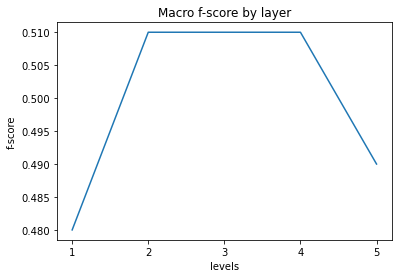

In [6]:
# plot f-score by levels
plt.plot(
    [i for i in range(1, 6)],
    [mapped_fscores[i] for i in range(1, 6)],
)
plt.xlabel("levels")
plt.ylabel("f-score")
plt.title("Macro f-score by layer")
plt.xticks([i for i in range(1, 6)])
plt.show()

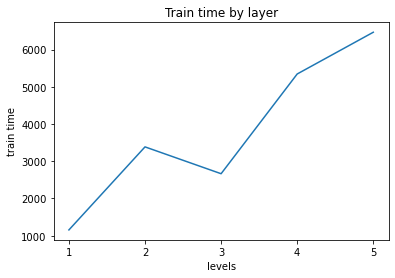

In [7]:
# plot train time by levels
plt.plot(
    [i for i in range(1, 6)],
    [mapped_train_time[i] for i in range(1, 6)],
)
plt.xlabel("levels")
plt.ylabel("train time")
plt.title("Train time by layer")
plt.xticks([i for i in range(1, 6)])
plt.show()